In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

In [21]:
#Load Dataset
df=pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
#Dataset Attributes
df1 = df.drop('Outcome',axis=1)
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [4]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
data1 = pp.ProfileReport(df)
data1.to_file('diabetes.html')
display(IFrame('diabetes.html', width=900, height=350))

In [23]:
# Summary of N/A Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

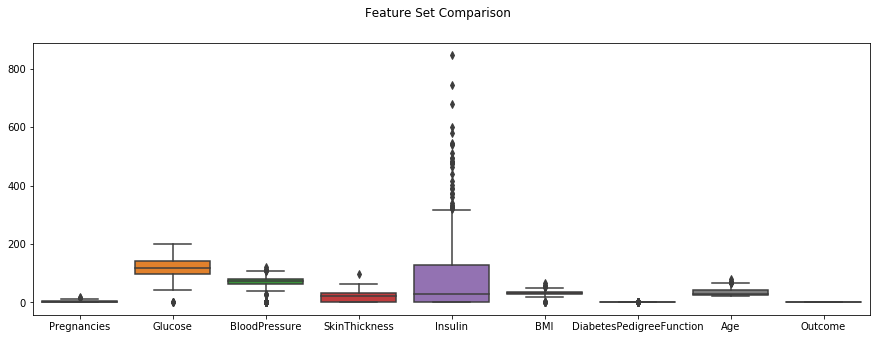

In [24]:
# BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=df)
plt.show()

In [25]:
#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(df.drop('Outcome',axis=1),0,list(df.drop('Outcome',axis=1)))
df.drop('Outcome',axis=1).loc[Outliers_to_drop]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
159,17,163,72,41,114,40.9,0.817,47
298,14,100,78,25,184,36.6,0.412,46
455,14,175,62,30,0,33.6,0.212,38
75,1,0,48,20,0,24.7,0.140,22
182,1,0,74,20,23,27.7,0.299,21
342,1,0,68,35,0,32.0,0.389,22
349,5,0,80,32,0,41.0,0.346,37
502,6,0,68,41,0,39.0,0.727,41
7,10,115,0,0,0,35.3,0.134,29


In [26]:
#Create New Dataset without Outliers
good_data = df.drop(df.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 9 columns):
Pregnancies                 639 non-null int64
Glucose                     639 non-null int64
BloodPressure               639 non-null int64
SkinThickness               639 non-null int64
Insulin                     639 non-null int64
BMI                         639 non-null float64
DiabetesPedigreeFunction    639 non-null float64
Age                         639 non-null int64
Outcome                     639 non-null int64
dtypes: float64(2), int64(7)
memory usage: 45.0 KB


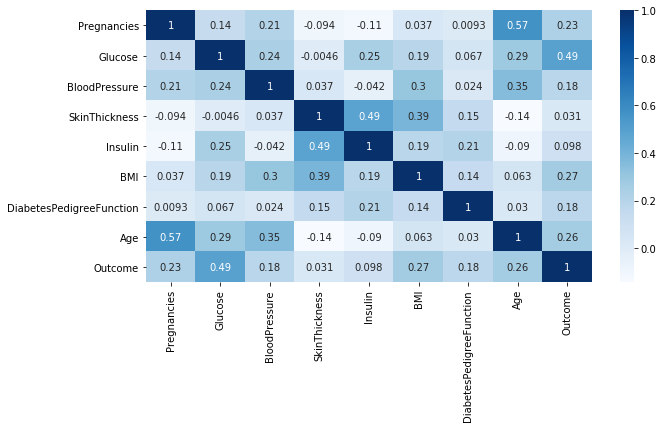

In [27]:
# Visualization of Correlations
fig = plt.figure(figsize=(10,5))
sns.heatmap(good_data.corr(),annot=True,cmap="Blues")

In [28]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(good_data,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: []


In [11]:
# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
data1 = pp.ProfileReport(good_data)
data1.to_file('diabetes.html')
display(IFrame('diabetes.html', width=900, height=350))

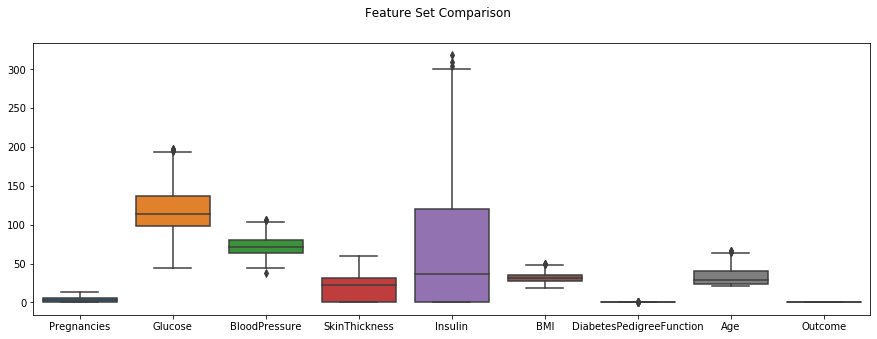

In [29]:
# BoxPlot Feature Set Comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Feature Set Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=good_data)
plt.show()

In [30]:
# Print rows with all values as 0
good_data[(good_data == 0).all(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


Class Split
0    439
1    200
Name: Outcome, dtype: int64


Text(0, 0.5, 'Count')

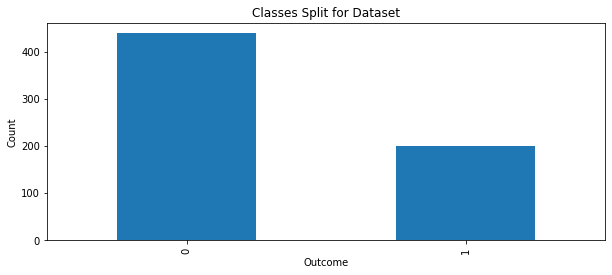

In [31]:
#Class Balance
print('Class Split')
print(good_data['Outcome'].value_counts())
good_data['Outcome'].value_counts().plot.bar(figsize=(10,4),title='Classes Split for Dataset')
plt.xlabel('Outcome')
plt.ylabel('Count')

In [32]:
#Create x and y variables
x = good_data.drop('Outcome', axis=1).values
Y = good_data['Outcome'].values

#Create Training Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.fit_transform(x_test)

#Import Model
from sklearn.svm import SVC

In [16]:
#Class Balance - Test Data
print('Train Data - Class Split')
Outcome_0= (y_train_smt == 0).sum()
Outcome_1 = (y_train_smt == 1).sum()
print('Class 0 -',  Outcome_0)
print('Class 1 -',  Outcome_1)

Train Data - Class Split
Class 0 - 351
Class 1 - 351


In [17]:
# Base SVM Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC())]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict)) 


Estimator: SVM
[[59 29]
 [ 6 34]]
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        88
           1       0.54      0.85      0.66        40

    accuracy                           0.73       128
   macro avg       0.72      0.76      0.72       128
weighted avg       0.79      0.73      0.74       128



In [18]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC())])
pipeline.insert(0,pipe_svm)

# Set grid search params 

modelpara =[]

param_gridsvm = { 
           "clf__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
           "clf__gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
           "clf__C" : [1, 10, 100, 1000]}
modelpara.insert(0,param_gridsvm)  

In [19]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle
X_shuffle, y_shuffle = shuffle(x_train2, y_train_smt)

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=X_shuffle, 
                                                            y=y_shuffle,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',
                                                            n_jobs=1,random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.5, 1.01])
    plt.show()

SVM - Learning Curve


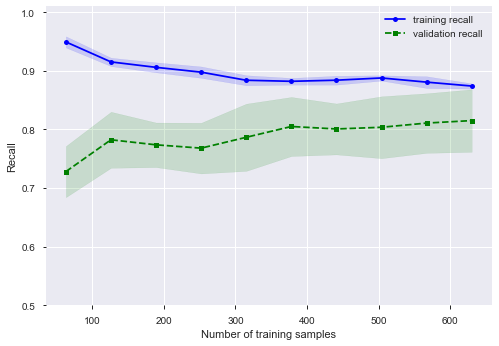

In [20]:
#Plot Learning Curve
print('SVM - Learning Curve')
plot_learning_curves(pipe_svm)

Model Evaluation - Recall Weighted
Support Vector Machines 0.81 +/- 0.05




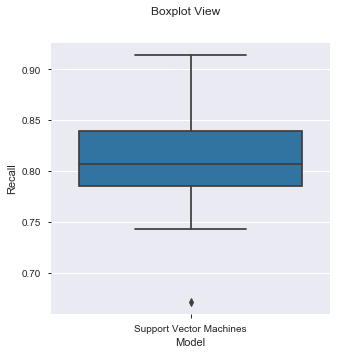

In [21]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Support Vector Machines',SVC(gamma='auto')))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Weighted')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train2,y_train_smt,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()


Optimized Model

Model Name: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Best Parameters: {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}

 [[61 27]
 [ 8 32]]

               precision    recall  f1-score   support

     Class 0       0.88      0.69      0.78        88
     Class 1       0.54      0.80      0.65        40

    accuracy                           0.73       128
   macro avg       0.71      0.75      0.71       128
weighted avg       0.78      0.73      0.74       128


NestedCV Accuracy(weighted) :0.78 +/-0.02 
NestedCV Precision(weighted) :0.78 +/-0.03 
NestedCV Recall(weighted) :0.78 +/-0.02 


ROC Curve


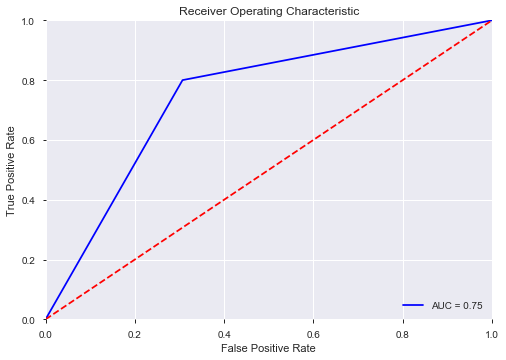

In [22]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=1, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train2, y_train_smt)
    model = gs_clf.best_estimator_
    
    #Nested CV
    x_2 = sc.fit_transform(x)
    scoreACC = cross_val_score(gs_clf, x_2, Y, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, x_2, Y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, x_2, Y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)
    
    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    target_names=['Class 0','Class 1']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))
    print('\n')
    
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   

#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

Support Vector Machines

Permutation Importance




Weight,Feature
0.1359 ± 0.0480,Glucose
0.0641 ± 0.0478,DiabetesPedigreeFunction
0.0594 ± 0.0212,Pregnancies
0.0578 ± 0.0322,Age
0.0391 ± 0.0407,BMI
0.0109 ± 0.0077,Insulin
-0.0016 ± 0.0269,SkinThickness
-0.0078 ± 0.0198,BloodPressure


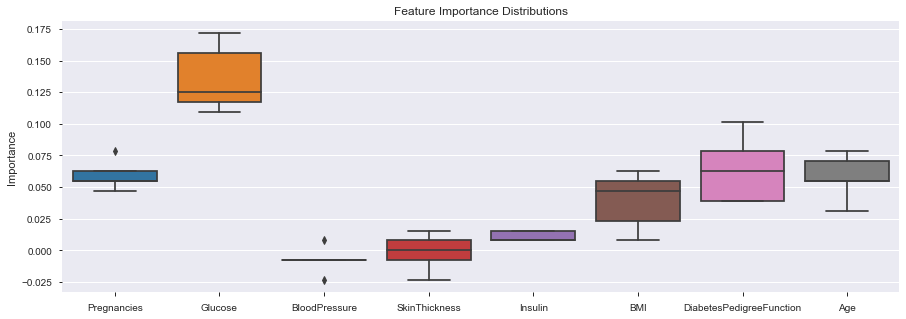

In [23]:
#Next Steps - Feature Importance
import eli5
from eli5.sklearn import PermutationImportance
from IPython.display import display

for name, model in models:
    print(name)
    perm=PermutationImportance(model.fit(x_train2,y_train_smt),random_state=100).fit(x_test2,y_test)
    features=good_data.drop('Outcome',axis=1).columns
    print('\nPermutation Importance')
    print('\n')
    df=eli5.show_weights(perm,feature_names=good_data.drop('Outcome',axis=1).columns.tolist())
    display(df)
    df2= pd.DataFrame(data=perm.results_,columns=features)
    fig = plt.figure(figsize=(15,5))
    sns.boxplot(data=df2).set(title='Feature Importance Distributions',
                             ylabel='Importance')
    plt.show()

In [24]:
#VIF Factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = good_data._get_numeric_data() #This line will drop non-numeric cols
x = good_data.drop('Outcome',axis=1)

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.sort_values('VIF Factor')

,VIF Factor,features
4,2.554788,Insulin
0,3.484846,Pregnancies
6,4.100191,DiabetesPedigreeFunction
3,4.430741,SkinThickness
7,16.588756,Age
1,20.947945,Glucose
5,30.960665,BMI
2,37.356434,BloodPressure


In [33]:
#Create x and y variables
x = good_data.drop(['Outcome', 'BloodPressure'], axis=1).values
Y = good_data['Outcome'].values

#Create Training Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.fit_transform(x_test)

#Import Model
from sklearn.svm import SVC

In [34]:
#Class Balance - Test Data
print('Train Data - Class Split')
Outcome_0= (y_train_smt == 0).sum()
Outcome_1 = (y_train_smt == 1).sum()
print('Class 0 -',  Outcome_0)
print('Class 1 -',  Outcome_1)

Train Data - Class Split
Class 0 - 351
Class 1 - 351


In [35]:
# Base SVM Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC())]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict)) 


Estimator: SVM
[[60 28]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.78        88
           1       0.56      0.88      0.68        40

    accuracy                           0.74       128
   macro avg       0.74      0.78      0.73       128
weighted avg       0.81      0.74      0.75       128



In [36]:
# Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_svm = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC())])
pipeline.insert(0,pipe_svm)

# Set grid search params 

modelpara =[]

param_gridsvm = { 
           "clf__kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
           "clf__gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
           "clf__C" : [1, 10, 100, 1000]}
modelpara.insert(0,param_gridsvm)

Model Evaluation - Recall Weighted
Support Vector Machines 0.81 +/- 0.04




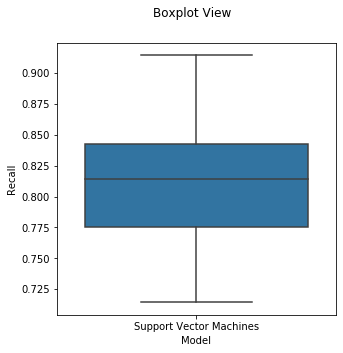

In [19]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('Support Vector Machines',SVC(gamma='auto')))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Weighted')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x_train2,y_train_smt,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')

fig = plt.figure(figsize=(5,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()


Optimized Model

Model Name: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Best Parameters: {'clf__C': 100, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}

 [[69 19]
 [15 25]]

               precision    recall  f1-score   support

     Class 0       0.82      0.78      0.80        88
     Class 1       0.57      0.62      0.60        40

    accuracy                           0.73       128
   macro avg       0.69      0.70      0.70       128
weighted avg       0.74      0.73      0.74       128


NestedCV Accuracy(weighted) :0.79 +/-0.02 
NestedCV Precision(weighted) :0.79 +/-0.03 
NestedCV Recall(weighted) :0.79 +/-0.02 


ROC Curve


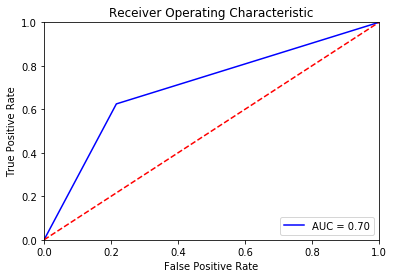

In [37]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=1, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train2, y_train_smt)
    model = gs_clf.best_estimator_
    
    #Nested CV
    x_2 = sc.fit_transform(x)
    scoreACC = cross_val_score(gs_clf, x_2, Y, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, x_2, Y, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, x_2, Y, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test2)
    
    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
        
    #Output Validation Statistics
    target_names=['Class 0','Class 1']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))
    print('\n')
    
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   

#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)